In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_excel("Accident analysis.xlsx")
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,1,2021-06-27,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,55.835218,Daylight,North Larkshire,None,...,1,2,Strathclyde,Dry,Single carriageway,60,09:35:00,Rural,Fine no high winds,Car
1,2,2021-07-04,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,55.855145,Darkness - no lighting,North Larkshire,Previous accident,...,1,6,Strathclyde,Dry,Dual carriageway,70,23:35:00,Rural,Fine no high winds,Motorcycle 125cc and under
2,3,2021-08-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,Fatal,55.835794,Daylight,North Larkshire,None,...,2,2,Strathclyde,Dry,Single carriageway,60,17:41:00,Rural,Fine no high winds,Car
3,4,2021-01-02,Friday,Give way or uncontrolled,T or staggered junction,Slight,54.473619,Daylight,Eden,None,...,1,1,Cumbria,Wet or damp,NaN,30,12:35:00,Rural,Fine no high winds,Car
4,5,2021-01-05,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,54.537690,Daylight,Copeland,None,...,2,2,Cumbria,Frost or ice,Single carriageway,60,09:03:00,Rural,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30424,30425,2022-03-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Fatal,51.441368,Daylight,Greenwich,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:43:00,Urban,Fine no high winds,Car
30425,30426,2022-03-28,Sunday,Data missing or out of range,Not at junction or within 20 metres,Fatal,51.444587,Daylight,Lambeth,None,...,1,1,Metropolitan Police,Dry,Single carriageway,30,13:52:00,Urban,Fine no high winds,Motorcycle 125cc and under
30426,30427,2022-10-08,Friday,Data missing or out of range,Not at junction or within 20 metres,Fatal,51.645718,Daylight,Enfield,None,...,1,1,Metropolitan Police,Dry,Single carriageway,30,12:00:00,Urban,Fine no high winds,Motorcycle over 500cc
30427,30428,2022-01-19,Tuesday,Give way or uncontrolled,Slip road,Fatal,51.437839,Daylight,Hounslow,None,...,1,1,Metropolitan Police,Wet or damp,Dual carriageway,50,08:56:00,Urban,Fine no high winds,Car


In [3]:
df.describe()

,Accident_Index,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000
mean,15215.000000,52.118352,-0.781020,1.300536,1.763712,33.827599
std,8784.240007,1.112080,1.166411,0.846598,0.662452,9.817079
min,1.000000,50.131438,-6.203171,1.000000,1.000000,20.000000
25%,7608.000000,51.481486,-1.443361,1.000000,1.000000,30.000000
50%,15215.000000,51.540360,-0.176367,1.000000,2.000000,30.000000
75%,22822.000000,52.510880,-0.071488,1.000000,2.000000,30.000000
max,30429.000000,58.596583,1.736892,48.000000,16.000000,70.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30429 entries, 0 to 30428
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accident_Index              30429 non-null  int64         
 1   Accident Date               30429 non-null  datetime64[ns]
 2   Day_of_Week                 30429 non-null  object        
 3   Junction_Control            30429 non-null  object        
 4   Junction_Detail             30429 non-null  object        
 5   Accident_Severity           30429 non-null  object        
 6   Latitude                    30429 non-null  float64       
 7   Light_Conditions            30429 non-null  object        
 8   Local_Authority_(District)  30429 non-null  object        
 9   Carriageway_Hazards         30429 non-null  object        
 10  Longitude                   30429 non-null  float64       
 11  Number_of_Casualties        30429 non-null  int64     

In [5]:
df.drop(['Accident_Index',"Latitude",'Longitude','Time'],axis=1,inplace=True)

In [6]:
df.head(1)

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2021-06-27,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,North Larkshire,None,1,2,Strathclyde,Dry,Single carriageway,60,Rural,Fine no high winds,Car


In [7]:
df.rename(columns={'Accident Date':'Accident_Date','Local_Authority_(District)':'Local_Authority_District'},inplace=True)

In [8]:
df.columns

Index(['Accident_Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Local_Authority_District',
       'Carriageway_Hazards', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [9]:
df['Road_Type'].mode()

0    Single carriageway
Name: Road_Type, dtype: object

In [10]:
df['Road_Type'].fillna(df['Road_Type'].mode()[0],inplace=True)

In [11]:
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0],inplace=True)

In [12]:
import datetime
acc_mons=df['Accident_Date'].dt.month
acc_mons

0         6
1         7
2         8
3         1
4         1
         ..
30424     3
30425     3
30426    10
30427     1
30428     1
Name: Accident_Date, Length: 30429, dtype: int64

In [13]:
df.insert(1,'Accident_months',acc_mons)
df.head(1)

,Accident_Date,Accident_months,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_District,Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2021-06-27,6,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,North Larkshire,None,1,2,Strathclyde,Dry,Single carriageway,60,Rural,Fine no high winds,Car


In [14]:
df.Accident_months.value_counts()

10    2921
11    2749
6     2721
5     2659
9     2654
7     2627
3     2537
4     2532
8     2402
12    2357
1     2292
2     1978
Name: Accident_months, dtype: int64

# Visualization

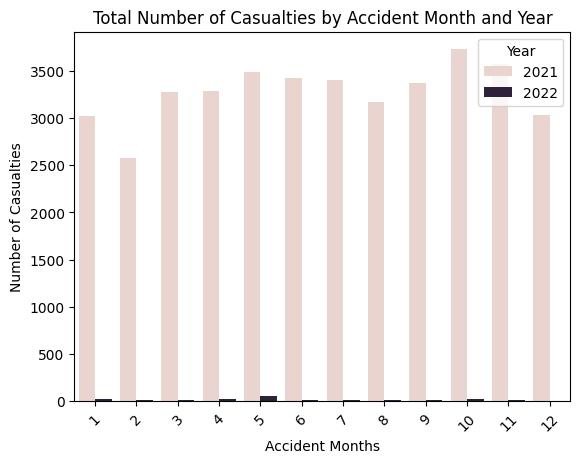

In [15]:
df['Accident_Year'] = df['Accident_Date'].dt.year
# Aggregate the data by month and year
monthly_data = df.groupby(['Accident_months', 'Accident_Year'])['Number_of_Casualties'].sum().reset_index()
# Plot using Seaborn
sns.barplot(data=monthly_data, x='Accident_months', y='Number_of_Casualties', hue='Accident_Year')
plt.xlabel('Accident Months')
plt.ylabel('Number of Casualties')
plt.title('Total Number of Casualties by Accident Month and Year')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [16]:
df[df['Accident_Date'].dt.year==2022]

,Accident_Date,Accident_months,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_District,Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Year
3119,2022-01-03,1,Sunday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Darkness - no lighting,Carlisle,None,4,1,Cumbria,Wet or damp,Single carriageway,60,Rural,Fine no high winds,Car,2022
3120,2022-01-29,1,Friday,Give way or uncontrolled,T or staggered junction,Fatal,Daylight,South Lakeland,None,5,2,Cumbria,Dry,Single carriageway,60,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022
3121,2022-01-30,1,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,South Lakeland,None,3,2,Cumbria,Frost or ice,Single carriageway,50,Rural,Fine no high winds,Car,2022
3122,2022-03-02,3,Tuesday,Give way or uncontrolled,Crossroads,Fatal,Daylight,Allerdale,None,2,2,Cumbria,Dry,Single carriageway,60,Rural,Fine no high winds,Car,2022
3123,2022-03-16,3,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Darkness - no lighting,Carlisle,None,2,2,Cumbria,Wet or damp,Single carriageway,60,Rural,Fine no high winds,Car,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30424,2022-03-21,3,Sunday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,Greenwich,None,1,2,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Car,2022
30425,2022-03-28,3,Sunday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,Lambeth,None,1,1,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Motorcycle 125cc and under,2022
30426,2022-10-08,10,Friday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,Enfield,None,1,1,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Motorcycle over 500cc,2022
30427,2022-01-19,1,Tuesday,Give way or uncontrolled,Slip road,Fatal,Daylight,Hounslow,None,1,1,Metropolitan Police,Wet or damp,Dual carriageway,50,Urban,Fine no high winds,Car,2022


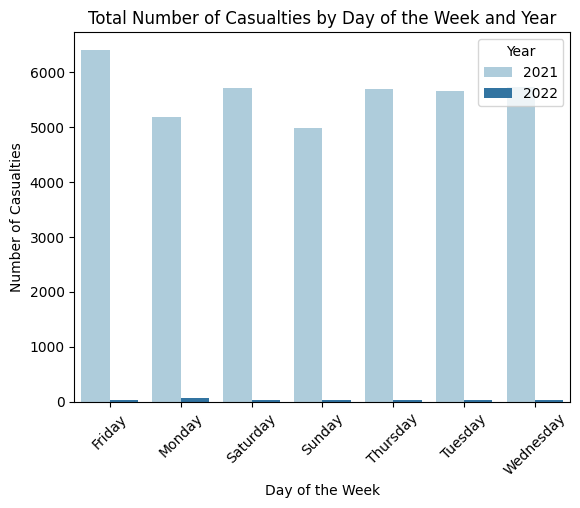

In [17]:
daily_data = df.groupby(['Day_of_Week', 'Accident_Year'])['Number_of_Casualties'].sum().reset_index()
sns.barplot(data=daily_data, x='Day_of_Week', y='Number_of_Casualties', hue='Accident_Year', palette='Paired')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualties')
plt.title('Total Number of Casualties by Day of the Week and Year')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [18]:
df.drop('Accident_Date',axis=1,inplace=True)

In [19]:
df.groupby('Junction_Control')[['Junction_Detail']].count()

,Junction_Detail
Junction_Control,
Authorised person,23
Auto traffic signal,5090
Data missing or out of range,8927
Give way or uncontrolled,15553
Not at junction or within 20 metres,750
Stop sign,86


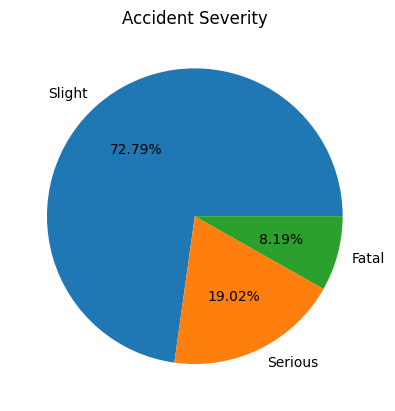

In [20]:
plt.pie(df['Accident_Severity'].value_counts(),autopct='%.2f%%',labels=['Slight','Serious','Fatal'])
plt.title("Accident Severity")
plt.show()

In [21]:
piv_tab=pd.pivot_table(df,index='Light_Conditions',columns='Accident_Severity',values='Number_of_Casualties',aggfunc=sum);
piv_tab

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,34,49,73
Darkness - lights lit,1033,2324,7258
Darkness - lights unlit,17,32,58
Darkness - no lighting,797,313,335
Daylight,2576,5292,19383


In [22]:
df.groupby('Carriageway_Hazards')[['Number_of_Casualties']].count()

,Number_of_Casualties
Carriageway_Hazards,
Any animal in carriageway (except ridden horse),79
None,30088
Other object on road,161
Pedestrian in carriageway - not injured,54
Previous accident,36
Vehicle load on road,11


In [23]:
df.groupby('Number_of_Vehicles')[['Number_of_Casualties']].count()

,Number_of_Casualties
Number_of_Vehicles,
1,10116
2,18028
3,1836
4,330
5,80
6,26
7,6
8,2
9,2


In [24]:
df.groupby('Road_Surface_Conditions')[['Number_of_Casualties']].count()

,Number_of_Casualties
Road_Surface_Conditions,
Dry,22880
Flood over 3cm. deep,29
Frost or ice,478
Snow,213
Wet or damp,6829


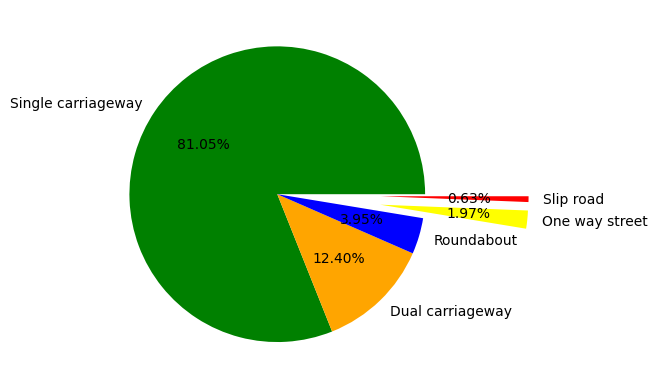

In [25]:
a=df['Road_Type'].value_counts()
explode=[0.7 if i==4 or i==3 else 0 for i in range(len(a))]
plt.pie(a,labels=['Single carriageway','Dual carriageway','Roundabout','One way street',
        'Slip road'],autopct='%.2f%%',colors=['green','orange','blue','yellow','red'],explode=explode);

In [26]:
pd.pivot_table(df,index='Road_Type',columns='Road_Surface_Conditions',values='Number_of_Casualties',aggfunc='sum')

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Road_Type,,,,,
Dual carriageway,3947.0,19.0,68.0,57.0,1286.0
One way street,528.0,NaN,7.0,4.0,162.0
Roundabout,1118.0,NaN,17.0,6.0,364.0
Single carriageway,23316.0,27.0,584.0,213.0,7602.0
Slip road,184.0,NaN,5.0,1.0,59.0


In [27]:
pd.pivot_table(df,index='Vehicle_Type',columns='Speed_limit',values='Number_of_Casualties')

Speed_limit,20,30,40,50,60,70
Vehicle_Type,,,,,,
Agricultural vehicle,1.000000,1.102041,2.000000,1.500000,2.500000,1.000000
Bus or coach (17 or more pass seats),1.714286,1.246512,1.482759,1.730769,1.829268,1.900000
Car,1.201923,1.224839,1.536028,1.514663,1.783079,1.866900
Goods 7.5 tonnes mgw and over,1.000000,1.171200,1.517241,1.480000,1.731707,1.000000
Goods over 3.5t. and under 7.5t,NaN,1.403846,1.750000,1.500000,4.857143,1.333333
Minibus (8 - 16 passenger seats),1.000000,1.242424,1.000000,2.000000,2.400000,2.000000
Motorcycle 125cc and under,1.500000,1.257246,1.434783,1.578947,1.860465,2.300000
Motorcycle 50cc and under,1.000000,1.228169,1.500000,1.300000,1.514286,1.444444
Motorcycle over 125cc and up to 500cc,1.000000,1.328358,1.500000,1.200000,2.000000,2.875000


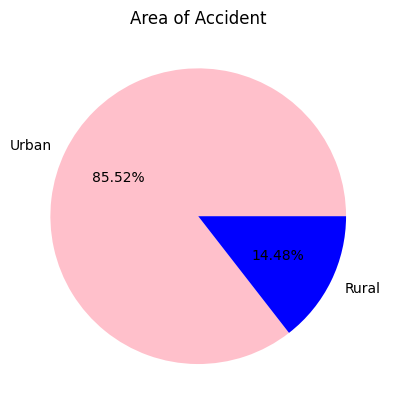

In [28]:
plt.pie(df.Urban_or_Rural_Area.value_counts(),labels=['Urban','Rural'],autopct='%.2f%%',colors=['pink','blue'])
plt.title("Area of Accident");

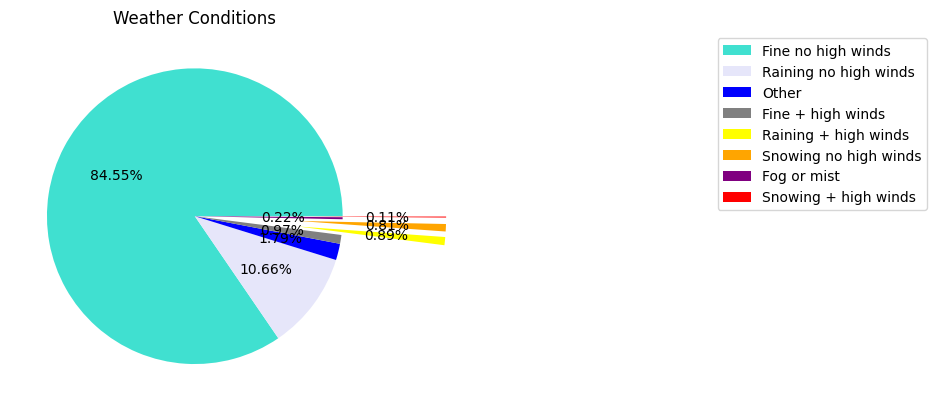

In [29]:
b=df['Weather_Conditions'].value_counts()
explode=[0.7 if i==4 or i==5 or i==7 else 0 for i in range(len(b))]
label=['Fine no high winds','Raining no high winds','Other','Fine + high winds','Raining + high winds','Snowing no high winds',
        'Fog or mist','Snowing + high winds']
plt.pie(b,autopct='%.2f%%',colors=['Turquoise','lavender','blue','grey','yellow','orange','purple','red'],explode=explode)
plt.legend(label,loc='upper right',bbox_to_anchor=(2.5, 1))
plt.title("Weather Conditions");

In [30]:
df1=df.copy()
df1.head()

,Accident_months,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_District,Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Year
0,6,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,North Larkshire,None,1,2,Strathclyde,Dry,Single carriageway,60,Rural,Fine no high winds,Car,2021
1,7,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Darkness - no lighting,North Larkshire,Previous accident,1,6,Strathclyde,Dry,Dual carriageway,70,Rural,Fine no high winds,Motorcycle 125cc and under,2021
2,8,Thursday,Data missing or out of range,Not at junction or within 20 metres,Fatal,Daylight,North Larkshire,None,2,2,Strathclyde,Dry,Single carriageway,60,Rural,Fine no high winds,Car,2021
3,1,Friday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Eden,None,1,1,Cumbria,Wet or damp,Single carriageway,30,Rural,Fine no high winds,Car,2021
4,1,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Copeland,None,2,2,Cumbria,Frost or ice,Single carriageway,60,Rural,Fine no high winds,Car,2021


In [31]:
df1.drop('Accident_Year',axis=1,inplace=True)

In [32]:
df1.shape

(30429, 17)

In [33]:
cols1=list(df1.columns)
cols1.insert(21,cols1.pop(cols1.index('Accident_Severity')))
df1=df1.loc[:,cols1]
df1

,Accident_months,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_District,Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Severity
0,6,Saturday,Data missing or out of range,Not at junction or within 20 metres,Daylight,North Larkshire,None,1,2,Strathclyde,Dry,Single carriageway,60,Rural,Fine no high winds,Car,Fatal
1,7,Saturday,Data missing or out of range,Not at junction or within 20 metres,Darkness - no lighting,North Larkshire,Previous accident,1,6,Strathclyde,Dry,Dual carriageway,70,Rural,Fine no high winds,Motorcycle 125cc and under,Fatal
2,8,Thursday,Data missing or out of range,Not at junction or within 20 metres,Daylight,North Larkshire,None,2,2,Strathclyde,Dry,Single carriageway,60,Rural,Fine no high winds,Car,Fatal
3,1,Friday,Give way or uncontrolled,T or staggered junction,Daylight,Eden,None,1,1,Cumbria,Wet or damp,Single carriageway,30,Rural,Fine no high winds,Car,Slight
4,1,Monday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Copeland,None,2,2,Cumbria,Frost or ice,Single carriageway,60,Rural,Fine no high winds,Car,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30424,3,Sunday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Greenwich,None,1,2,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Car,Fatal
30425,3,Sunday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Lambeth,None,1,1,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Motorcycle 125cc and under,Fatal
30426,10,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Enfield,None,1,1,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Motorcycle over 500cc,Fatal
30427,1,Tuesday,Give way or uncontrolled,Slip road,Daylight,Hounslow,None,1,1,Metropolitan Police,Wet or damp,Dual carriageway,50,Urban,Fine no high winds,Car,Fatal


In [34]:
df.Accident_Severity.value_counts()

Slight     22149
Serious     5788
Fatal       2492
Name: Accident_Severity, dtype: int64

In [35]:
df['Carriageway_Hazards'].value_counts()

None                                               30088
Other object on road                                 161
Any animal in carriageway (except ridden horse)       79
Pedestrian in carriageway - not injured               54
Previous accident                                     36
Vehicle load on road                                  11
Name: Carriageway_Hazards, dtype: int64

In [36]:
df['Junction_Control'].value_counts()

Give way or uncontrolled               15553
Data missing or out of range            8927
Auto traffic signal                     5090
Not at junction or within 20 metres      750
Stop sign                                 86
Authorised person                         23
Name: Junction_Control, dtype: int64

In [37]:
df['Junction_Detail'].value_counts()

T or staggered junction                12350
Not at junction or within 20 metres     9663
Crossroads                              4567
Roundabout                              1559
Private drive or entrance                785
Other junction                           501
More than 4 arms (not roundabout)        381
Mini-roundabout                          361
Slip road                                262
Name: Junction_Detail, dtype: int64

In [38]:
df['Light_Conditions'].value_counts()

Daylight                       21461
Darkness - lights lit           8020
Darkness - no lighting           764
Darkness - lighting unknown      115
Darkness - lights unlit           69
Name: Light_Conditions, dtype: int64

In [39]:
df['Local_Authority_District'].value_counts().count()

392

In [40]:
df['Police_Force'].value_counts().count()

51

In [41]:
df1['Police_Force'].value_counts().count()

51

In [42]:
df['Road_Surface_Conditions'].value_counts()

Dry                     22880
Wet or damp              6829
Frost or ice              478
Snow                      213
Flood over 3cm. deep       29
Name: Road_Surface_Conditions, dtype: int64

In [43]:
df['Road_Type'].value_counts()

Single carriageway    24662
Dual carriageway       3774
Roundabout             1202
One way street          600
Slip road               191
Name: Road_Type, dtype: int64

In [44]:
df['Number_of_Casualties'].value_counts()

1     24456
2      4140
3      1136
4       418
5       157
6        76
7        18
8         5
10        4
13        4
9         4
11        3
21        2
12        2
18        2
40        1
48        1
Name: Number_of_Casualties, dtype: int64

In [50]:
import seaborn as sns
sns.boxplot(x=df['Number_of_Vehicles'])
plt.title("Box Plot for Number of Vehicles")
plt.show()

In [56]:
df1.to_excel('cleaned_accident_data.xlsx',index=False)

In [57]:
df.Weather_Conditions.value_counts()

Fine no high winds       25728
Raining no high winds     3245
Other                      545
Fine + high winds          294
Raining + high winds       271
Snowing no high winds      246
Fog or mist                 67
Snowing + high winds        33
Name: Weather_Conditions, dtype: int64

In [58]:
df.Vehicle_Type.value_counts()

Car                                      25171
Van / Goods 3.5 tonnes mgw or under       1715
Goods 7.5 tonnes mgw and over              731
Motorcycle 125cc and under                 649
Bus or coach (17 or more pass seats)       543
Taxi/Private hire car                      484
Motorcycle 50cc and under                  437
Motorcycle over 500cc                      316
Motorcycle over 125cc and up to 500cc      108
Minibus (8 - 16 passenger seats)            76
Other vehicle                               72
Goods over 3.5t. and under 7.5t             68
Agricultural vehicle                        59
Name: Vehicle_Type, dtype: int64

In [59]:
df['Urban_or_Rural_Area'].value_counts()

Urban    26024
Rural     4405
Name: Urban_or_Rural_Area, dtype: int64

In [60]:
df.iloc[156,:]

Accident_months                                               2
Day_of_Week                                           Wednesday
Junction_Control                   Data missing or out of range
Junction_Detail             Not at junction or within 20 metres
Accident_Severity                                        Slight
Light_Conditions                                       Daylight
Local_Authority_District                               Carlisle
Carriageway_Hazards                                        None
Number_of_Casualties                                          1
Number_of_Vehicles                                            2
Police_Force                                            Cumbria
Road_Surface_Conditions                                     Dry
Road_Type                                    Single carriageway
Speed_limit                                                  60
Urban_or_Rural_Area                                       Rural
Weather_Conditions                      